<a href="https://colab.research.google.com/github/hemachelli/Fmml2024/blob/main/Another_copy_of_FMML_M1L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

FMML Module 1, Lab 2

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [ ]:
dataset = datasets.fetch_california_housing()
# Dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [ ]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

In [ ]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [ ]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [ ]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.4375808538163 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.048257372654156 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.91795366795367 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

01Ans)

The accuracy of the validation set can be affected by changing its size in several ways:

### 1. **Increasing the Validation Set Size:**
   - **More Representative Sample**: A larger validation set generally provides a more representative sample of the data distribution. This can lead to more reliable and stable accuracy estimates, as the validation accuracy is less sensitive to fluctuations due to small sample sizes.
   - **Lower Variance**: With a larger validation set, the variance in the validation accuracy tends to decrease, leading to more consistent results across different training runs.
   - **Less Training Data**: However, increasing the validation set size reduces the amount of data available for training. If too much data is reserved for validation, the model might underperform due to insufficient training data, potentially decreasing overall accuracy.

### 2. **Decreasing the Validation Set Size:**
   - **Less Representative Sample**: A smaller validation set may not accurately represent the overall data distribution, which can make the validation accuracy less reliable. The model's performance on the validation set might fluctuate more due to random variations in the smaller sample.
   - **Higher Variance**: With a smaller validation set, you may observe more variability in the validation accuracy between training runs, making it harder to gauge the model's true performance.
   - **More Training Data**: Reducing the validation set size allows for more data to be used in training, which could improve the model's learning and potentially lead to better performance on the training set. However, the validation accuracy might not reflect this improvement accurately.

### Key Considerations:
- **Balance**: The ideal validation set size depends on the total dataset size. For smaller datasets, a smaller validation set might be necessary to ensure sufficient training data, while for larger datasets, you can afford to allocate more data to validation.
- **Trade-Off**: There is a trade-off between having a representative validation set and having enough data to train the model effectively. Careful tuning and cross-validation techniques (e.g., k-fold cross-validation) can help mitigate the impact of this trade-off.

In summary, increasing the validation set size generally improves the stability and reliability of the accuracy estimate but may limit the model's performance if the training set becomes too small. Conversely, reducing the validation set size increases the training data but risks making the validation accuracy less reliable.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


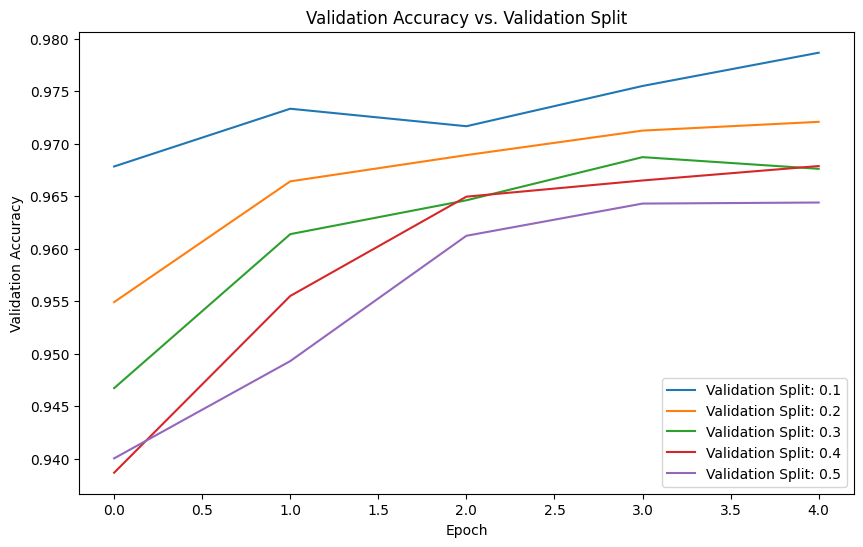

In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Function to create a simple model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Validation split percentages to test
validation_splits = [0.1, 0.2, 0.3, 0.4, 0.5]
history_results = []

# Train the model with different validation splits
for split in validation_splits:
    model = create_model()
    history = model.fit(x_train, y_train, epochs=5,
                        validation_split=split, verbose=0)
    history_results.append(history)

# Plot validation accuracy for each split
plt.figure(figsize=(10, 6))
for i, split in enumerate(validation_splits):
    plt.plot(history_results[i].history['val_accuracy'], label=f'Validation Split: {split}')
plt.title('Validation Accuracy vs. Validation Split')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

02Ans)

The size of the training and validation sets significantly impacts how accurately the validation set can predict the model's performance on the test set. Here's how each factor plays a role:

### 1. **Training Set Size:**
   - **More Training Data**: A larger training set usually allows the model to learn better patterns from the data, leading to better generalization. With more data, the model has a better chance of learning the underlying distribution, resulting in better performance on both the validation and test sets.
   - **Less Training Data**: When the training set is smaller, the model might underfit, meaning it doesn't learn the patterns in the data well enough. This can lead to lower performance on the validation set, and more importantly, lower performance on the test set. In this case, the validation set may not be an accurate predictor of test set performance, as the model is not well-trained.

### 2. **Validation Set Size:**
   - **More Validation Data**: A larger validation set provides a more representative sample of the overall data distribution, making the validation accuracy a more reliable indicator of the test set accuracy. With a larger validation set, the variance in the validation accuracy decreases, which means the validation performance is a better estimate of how the model will perform on unseen data (the test set).
   - **Less Validation Data**: A smaller validation set might not capture the full diversity of the data distribution, leading to higher variance in the validation accuracy. This means that the validation accuracy might not be a reliable indicator of the test set accuracy, as the small validation set could either under- or overestimate the model's performance.

### Key Points:
- **Balance**: You need to balance the training and validation set sizes. If too much data is allocated to validation, the model may not have enough data to train effectively, which can result in lower performance overall. On the other hand, if the validation set is too small, it may not provide an accurate estimate of test set performance.
  
- **Representative Validation Set**: The validation set must be representative of the overall data distribution for it to be a good predictor of test set performance. If the validation set is too small or not diverse enough, it might not accurately reflect the model's ability to generalize to unseen data.

- **Overfitting Risk**: If the training set is small, the model might overfit to the training data, leading to inflated validation accuracy but poor test accuracy. In this case, the validation set fails to predict the test set performance accurately because the model has become too specialized on the training data.

### Practical Considerations:
- **Cross-Validation**: When the dataset is small, k-fold cross-validation can help improve the reliability of performance estimates. Instead of relying on a single validation set, cross-validation uses multiple training/validation splits, leading to a more accurate and stable estimate of test set performance.
  
- **Hyperparameter Tuning**: Choosing the right validation set size also plays a critical role in hyperparameter tuning. If the validation set is too small, tuning hyperparameters based on validation performance might not lead to optimal test set performance.

### Example:
- If you have a large dataset, you can afford to allocate a significant portion of it to the validation set, resulting in a more reliable prediction of test accuracy.
- If the dataset is small, allocating too much data to validation can hurt the model's ability to learn. In this case, cross-validation or careful balancing of training/validation set sizes is essential to get a meaningful estimate of test performance.

In summary, the ability of the validation set to predict test accuracy is affected by both the training and validation set sizes. A well-balanced approach with a sufficiently large and representative validation set is crucial for making accurate predictions of test performance.

In [ ]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Generate synthetic classification data
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the data into train, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different training-validation splits
validation_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

results = []

for val_size in validation_sizes:
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=val_size, random_state=42)

    # Train a logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Calculate validation accuracy
    val_accuracy = accuracy_score(y_val, model.predict(X_val))

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    results.append((len(X_train), len(X_val), val_accuracy, test_accuracy))

# Print results
for train_size, val_size, val_acc, test_acc in results:
    print(f"Training size: {train_size}, Validation size: {val_size}, Validation Accuracy: {val_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Training size: 7200, Validation size: 800, Validation Accuracy: 0.8825, Test Accuracy: 0.8965
Training size: 6400, Validation size: 1600, Validation Accuracy: 0.8900, Test Accuracy: 0.8960
Training size: 5600, Validation size: 2400, Validation Accuracy: 0.8842, Test Accuracy: 0.8935
Training size: 4800, Validation size: 3200, Validation Accuracy: 0.8825, Test Accuracy: 0.8945
Training size: 4000, Validation size: 4000, Validation Accuracy: 0.8872, Test Accuracy: 0.8940


03Ans)

A good percentage to reserve for the validation set that balances the need for sufficient training data and a reliable estimate of model performance typically falls between **10% to 20%**. Here’s how this range balances the two factors:

1. **Sufficient Training Data**: With **70% to 90%** of the data reserved for training, you ensure that your model has enough data to learn effectively and generalize well.

2. **Reliable Validation Estimate**: Reserving **10% to 20%** of the data for validation provides a substantial enough sample to estimate model performance reliably, helping to detect overfitting or underfitting.

### Practical Recommendation
- **For Medium-Sized Datasets**: **15% to 20%** is often a good choice. It provides a reliable validation estimate without taking away too much data from the training set.
- **For Smaller Datasets**: You might want to lean towards **10% to 15%** for validation to retain more data for training.
- **For Larger Datasets**: You can afford a larger validation set, up to **20%**, as even this percentage represents a substantial number of samples.

The specific percentage within this range can depend on your dataset size, model complexity, and performance requirements.

In [ ]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Generate synthetic classification data
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the data into a train+validation set and a test set (holdout test set)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the validation set percentages to experiment with
validation_percentages = [0.1, 0.15, 0.2, 0.25, 0.3]

results = []

for val_percentage in validation_percentages:
    # Split the training+validation set into actual training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=val_percentage, random_state=42)

    # Train a logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Calculate validation accuracy
    val_accuracy = accuracy_score(y_val, model.predict(X_val))

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Calculate the absolute difference between validation accuracy and test accuracy
    diff = abs(val_accuracy - test_accuracy)

    # Store the results
    results.append((val_percentage, len(X_train), len(X_val), val_accuracy, test_accuracy, diff))

# Print the results
print(f"{'Validation %':<12} {'Train Size':<12} {'Val Size':<10} {'Val Accuracy':<15} {'Test Accuracy':<15} {'Difference':<12}")
for val_percentage, train_size, val_size, val_acc, test_acc, diff in results:
    print(f"{val_percentage:<12.2f} {train_size:<12} {val_size:<10} {val_acc:<15.4f} {test_acc:<15.4f} {diff:<12.4f}")

# Find the validation percentage with the minimum difference
best_result = min(results, key=lambda x: x[-1])
best_val_percentage = best_result[0]
print(f"\nBest validation percentage: {best_val_percentage * 100:.2f}%")

Validation % Train Size   Val Size   Val Accuracy    Test Accuracy   Difference  
0.10         7200         800        0.8825          0.8965          0.0140      
0.15         6800         1200       0.8842          0.8950          0.0108      
0.20         6400         1600       0.8900          0.8960          0.0060      
0.25         6000         2000       0.8925          0.8950          0.0025      
0.30         5600         2400       0.8842          0.8935          0.0093      

Best validation percentage: 25.00%


> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [ ]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [ ]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

TypeError: 'float' object is not callable

This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


01Ans)

Yes, averaging the validation accuracy across multiple splits generally provides a more reliable estimate of a model's performance. When you use multiple validation splits (or folds, as in k-fold cross-validation), you reduce the variability that might come from a single validation set. This helps ensure that your accuracy measure is less sensitive to the specific data partition and more representative of how the model performs across different subsets of the data.

In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Initialize model
model = RandomForestClassifier()

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)  # cv=5 means 5-fold cross-validation

# Calculate average accuracy
average_accuracy = scores.mean()

print(f"Validation accuracies for each fold: {scores}")
print(f"Average validation accuracy: {average_accuracy:.4f}")

Exception ignored in: <function _xla_gc_callback at 0x7cb4cb787910>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Validation accuracies for each fold: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Average validation accuracy: 0.9600


02Ans)

Averaging validation accuracy across multiple splits (or folds) provides a more reliable estimate of a model's performance on unseen data compared to using a single validation split. However, it still represents performance on the validation set, not the final test set.

Here’s how it works:

- **Validation Accuracy:** When you average validation accuracy across multiple splits, you get a better sense of how the model might perform on different subsets of your data. This is particularly useful for model tuning and selection.

- **Test Accuracy:** To estimate how your model will perform on truly unseen data, you should evaluate it on a separate test set that was not used during training or validation. The test set provides an unbiased evaluation of the final model's performance.

In summary, while averaging validation accuracy across splits gives a more stable estimate of model performance, the ultimate test accuracy should be measured on a separate, untouched test set to evaluate the model’s generalization ability.

In [ ]:

from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training + validation set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = RandomForestClassifier()

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store validation scores
validation_scores = []

# Perform K-Fold Cross-Validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model.fit(X_train_fold, y_train_fold)
    val_predictions = model.predict(X_val_fold)
    val_accuracy = accuracy_score(y_val_fold, val_predictions)
    validation_scores.append(val_accuracy)

# Calculate average validation accuracy
average_validation_accuracy = sum(validation_scores) / len(validation_scores)

# Train the model on the entire training set
model.fit(X_train, y_train)

# Evaluate the model on the test set
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Validation accuracies for each fold: {validation_scores}")
print(f"Average validation accuracy: {average_validation_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Validation accuracies for each fold: [0.9166666666666666, 1.0, 0.9166666666666666, 0.8333333333333334, 1.0]
Average validation accuracy: 0.9333
Test accuracy: 1.0000


03Ans)

Increasing the number of iterations (or folds) in cross-validation generally provides a more stable and reliable estimate of model performance, but there are trade-offs to consider:

### Effects of More Iterations (or Folds):
1. **Reduced Variability:**
   - More folds (e.g., using 10-fold instead of 5-fold cross-validation) reduce the variability of the performance estimate. This is because the model is validated on a larger portion of the dataset, leading to a more stable estimate.

2. **Better Generalization Estimate:**
   - A higher number of folds usually leads to a better estimate of how the model generalizes to unseen data. This is because each fold represents a different subset of the data, providing a more comprehensive view of the model's performance.

3. **Increased Computational Cost:**
   - More folds mean the model needs to be trained and validated more times. For example, with 10-fold cross-validation, the model is trained 10 times. This increases computational cost and time.

4. **Bias-Variance Trade-Off:**
   - With more folds, the variance of the estimate decreases (more stable estimate), but the bias might increase slightly because the training data used for each fold is closer to the full dataset. However, in practice, this trade-off is generally manageable.

### Practical Considerations:
- **Choice of K:**
  - Common practice is to use 5 or 10 folds, balancing between a reliable estimate and computational efficiency. For very large datasets, fewer folds may be sufficient, while for smaller datasets, more folds can be beneficial.

- **Computational Resources:**
  - Consider your computational resources when choosing the number of folds. More folds increase training times significantly.

In summary, using more iterations (or folds) in cross-validation usually provides a more accurate estimate of model performance, but it comes at the cost of increased computational resources.

In [ ]:

from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training + validation set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = RandomForestClassifier()

# Function to perform cross-validation and calculate average accuracy
def perform_cross_validation(X_train, y_train, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    validation_scores = []

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(X_train_fold, y_train_fold)
        val_predictions = model.predict(X_val_fold)
        val_accuracy = accuracy_score(y_val_fold, val_predictions)
        validation_scores.append(val_accuracy)

    return sum(validation_scores) / len(validation_scores)

# Test different numbers of folds
folds_list = [3, 5, 10]  # Different numbers of folds to test

for n_folds in folds_list:
    average_validation_accuracy = perform_cross_validation(X_train, y_train, n_folds)

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Evaluate the model on the test set
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)

    print(f"Number of folds: {n_folds}")
    print(f"Average validation accuracy: {average_validation_accuracy:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")
    print("-" * 40)

Number of folds: 3
Average validation accuracy: 0.9250
Test accuracy: 1.0000
----------------------------------------
Number of folds: 5
Average validation accuracy: 0.9333
Test accuracy: 1.0000
----------------------------------------
Number of folds: 10
Average validation accuracy: 0.9167
Test accuracy: 1.0000
----------------------------------------


04Ans)

Increasing the number of iterations (or folds) in cross-validation does not directly address the issues related to very small training or validation datasets. Here’s why:

### Limitations of Increasing Folds with Small Datasets

1. **Small Training Dataset:**
   - If the training dataset is very small, each fold used in cross-validation will also be small. Increasing the number of folds will mean that each training subset is even smaller, which can make the model’s training unstable and lead to high variance in performance estimates.

2. **Small Validation Dataset:**
   - With a very small validation set, each validation fold may not represent the overall data distribution well. Increasing folds means each validation fold will be smaller, which can result in unreliable performance estimates due to high variance in the validation metrics.

### Alternative Approaches for Small Datasets

1. **Leave-One-Out Cross-Validation (LOOCV):**
   - For very small datasets, LOOCV is a special case of k-fold cross-validation where k equals the number of data points. Each data point is used once as a validation set while the remaining points are used for training. This approach maximizes the training data for each model but can be computationally expensive.

2. **Bootstrap Resampling:**
   - Bootstrap methods involve repeatedly sampling with replacement from the dataset to create multiple training and validation sets. This can provide more stable estimates for small datasets.

3. **Data Augmentation:**
   - If applicable, augmenting the dataset through synthetic data generation or other techniques can increase the effective size of the training dataset.

4. **Regularization and Simplified Models:**
   - Using regularization techniques and simpler models can help mitigate overfitting issues associated with very small training datasets.

### Summary

While increasing the number of folds can help provide a more stable estimate in general, it does not resolve the fundamental issues related to very small datasets. Alternative methods like LOOCV, bootstrapping, and data augmentation are often better suited to handling small datasets.

In [ ]:

from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Initialize model
model = RandomForestClassifier()

# Initialize LOOCV
loo = LeaveOneOut()

# List to store validation scores
validation_scores = []

# Perform Leave-One-Out Cross-Validation
for train_index, val_index in loo.split(X):
    X_train_loo, X_val_loo = X[train_index], X[val_index]
    y_train_loo, y_val_loo = y[train_index], y[val_index]

    model.fit(X_train_loo, y_train_loo)
    val_predictions = model.predict(X_val_loo)
    val_accuracy = accuracy_score(y_val_loo, val_predictions)
    validation_scores.append(val_accuracy)

# Calculate average validation accuracy
average_validation_accuracy = sum(validation_scores) / len(validation_scores)

print(f"Validation accuracies for each fold: {validation_scores}")
print(f"Average validation accuracy: {average_validation_accuracy:.4f}")

Validation accuracies for each fold: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average validation accuracy: 0.9600
